In [26]:
# Dependencies
import pandas as pd
from pathlib import Path
from dash import Dash, html, dash_table, dcc, Input, Output
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

import plotly.graph_objs as go


In [27]:
# Upload data
df = "Clean_Australian_Shark_Attacks.csv"
df

clean_df = pd.read_csv(df, encoding = "CP1252")
clean_df

,Unnamed: 0,Incident.year,Victim.injury,State,Latitude,Longitude,Shark.common.name,Shark.scientific.name,Provoked/unprovoked,Site.category,Incident.month
0,0,1791,fatal,NSW,-33.86666667,151.2,white shark,Carcharodon carchariasÂ,unprovoked,coastal,1
1,3,1820,fatal,TAS,-42.8,147.5333333,unknown,unknown,provoked,coastal,1
2,9,1836,fatal,QLD,-25.48333333,152.9833333,whaler shark,Carcharhinidae,unprovoked,coastal,8
3,10,1836,fatal,QLD,-25.48333333,152.9833333,whaler shark,Carcharhinidae,unprovoked,coastal,8
4,11,1837,fatal,NSW,-30.93333333,153.0166667,bull shark,Carcharhinus leucas,unprovoked,river,1
...,...,...,...,...,...,...,...,...,...,...,...
1223,1200,2022,uninjured,WA,-31.97889,115.8247,bull shark,Carcharhinus leucas,provoked,estuary/harbour,5
1224,1203,2022,uninjured,NSW,-30.2962,153.1139,white shark,Carcharodon carchariasÂ,unprovoked,coastal,8
1225,1208,2022,uninjured,SA,-35.0316,152.9774722,white shark,Carcharodon carchariasÂ,unprovoked,coastal,10
1226,1211,2023,uninjured,WA,-33.6463583,115.0339741,whaler shark,Carcharhinus spp.,unprovoked,coastal,3


In [28]:
# Checking the number of records.
total_records = len(clean_df['Unnamed: 0'].unique())
total_records

1228

In [29]:
# select my chosen columns focusing on shark types based on state
injury_reduced_df = clean_df.loc[:, ["Incident.year", "Provoked/unprovoked", "Victim.injury", "Shark.common.name" ]]
injury_reduced_df

,Incident.year,Provoked/unprovoked,Victim.injury,Shark.common.name
0,1791,unprovoked,fatal,white shark
1,1820,provoked,fatal,unknown
2,1836,unprovoked,fatal,whaler shark
3,1836,unprovoked,fatal,whaler shark
4,1837,unprovoked,fatal,bull shark
...,...,...,...,...
1223,2022,provoked,uninjured,bull shark
1224,2022,unprovoked,uninjured,white shark
1225,2022,unprovoked,uninjured,white shark
1226,2023,unprovoked,uninjured,whaler shark


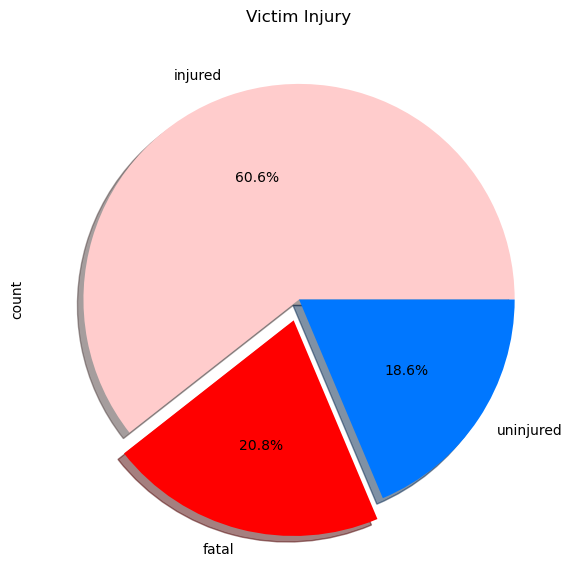

In [30]:
# Count occurrences of each category
victim_injury_counts = injury_reduced_df['Victim.injury'].value_counts()

# Define colors
colors = {'fatal': '#FF0000', 'injured': '#FFCCCC', 'uninjured': '#0077FF'}

# Define explode values
explode = (0, 0.1, 0)  # Explode the second slice (injured) by 0.1

# Plotting pie chart for Victim Injury with explode and shadow
plt.figure(figsize=(7, 7))
victim_injury_counts.plot(kind='pie', autopct='%1.1f%%', colors=[colors[key] for key in victim_injury_counts.index], explode=explode, shadow=True)
plt.title('Victim Injury')

plt.show()

In [36]:
# Count occurrences of injuries 
victim_injury_counts = injury_reduced_df['Victim.injury'].value_counts()

# Define the pie chart colors red - Fatal, pink - Injured, blue - uninjured
colors = {'fatal': '#FF0000', 'injured': '#00FF00', 'uninjured': '#0077FF'}

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout
app.layout = html.Div([
    dcc.Dropdown(
        id='dropdown',
        options=[
            {'label': 'Count', 'value': 'count'},
            {'label': 'Percentage', 'value': 'percentage'}
        ],
        value='count',
        clearable=False
    ),
    dcc.Graph(id='pie-chart')
])

# Define the callback to update the pie chart based on the dropdown selection
@app.callback(
    Output('pie-chart', 'figure'),
    [Input('dropdown', 'value')]
)
def update_pie_chart(selected_value):
    if selected_value == 'count':
        # Plotting pie chart for Victim Injury counts
        trace = go.Pie(
            labels=[label.capitalize() for label in victim_injury_counts.index],  # Capitalize labels
            values=victim_injury_counts.values,
            marker=dict(colors=[colors[key] for key in victim_injury_counts.index]),
            hoverinfo='label+value+percent',
            textinfo='value',
            textposition='inside',
            pull=[0.1 if label == 'fatal' else 0 for label in victim_injury_counts.index]  # Explode the 'fatal' slice
        )
    elif selected_value == 'percentage':
        # Plotting pie chart for Victim Injury percentages
        total = victim_injury_counts.sum()
        percentages = (victim_injury_counts / total) * 100
        trace = go.Pie(
            labels=[label.capitalize() for label in victim_injury_counts.index],  # Capitalize labels
            values=percentages.values,
            marker=dict(colors=[colors[key] for key in victim_injury_counts.index]),
            hoverinfo='label+value+percent',
            textinfo='percent',
            textposition='inside',
            pull=[0.1 if label == 'fatal' else 0 for label in victim_injury_counts.index]  # Explode the 'fatal' slice
        )

    layout = go.Layout(
        title='Shark Attack Victim Injury Types',
        margin=dict(l=0, r=0, t=30, b=0)
    )

    return {'data': [trace], 'layout': layout}

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)